In [9]:
%matplotlib inline
import numpy as np
import math
from scipy.interpolate import barycentric_interpolate
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.optimize import root

In [2]:

def cheb(N):
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

# Problem 1

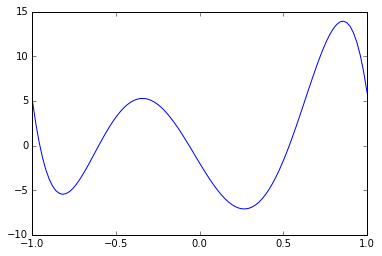

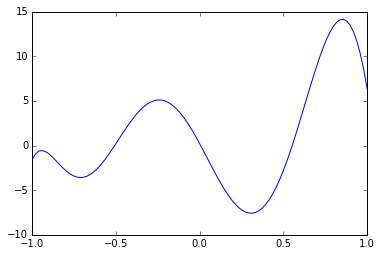

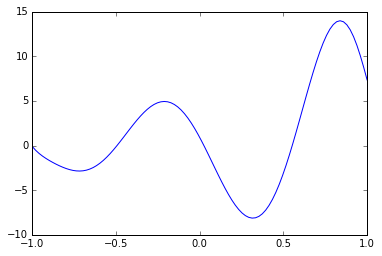

In [3]:
def prob1():
    u = lambda x: np.exp(x)*np.cos(6.*x)
    N = [6,8,10]

    grid = np.linspace(-1,1,100)
    for n in N:
        D,X = cheb(n)
        Du = np.dot(D,u(X))
        u_prime = barycentric_interpolate(X,Du,grid)

        plt.plot(grid,u_prime)
        plt.show()
prob1()

# Problem 2

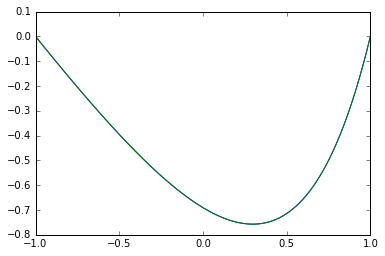

In [4]:
def prob2():
    N = 8
    D,X = cheb(N)
    grid = np.linspace(-1,1,100)
    f = lambda x: np.exp(2*x)
    F = f(X)
    D2 = np.dot(D, D)


    #This sets U[0] = U[N] = 0
    D2[0,:], D2[-1,:] = 0, 0
    D2[0,0], D2[-1,-1] = 1, 1
    F[0], F[-1] = 0, 0

    U = la.solve(D2,F)
    U_interpolated = barycentric_interpolate(X,U,grid)
    
    lit_u = lambda x: (-np.cosh(2) - np.sinh(2)*x + np.exp(2*x))/4.
    real_U = lit_u(grid)

    plt.plot(grid,real_U)
    plt.plot(grid,U_interpolated)
    plt.show()
prob2()

# Problem 3

In [14]:
def prob3():
    N = 8
    D,X = cheb(N)
    
    grid = np.linspace(-1,1,100)
    f = lambda x: np.exp(3*x)
    F = f(X)
    D2 = np.dot(D, D)
    D_new = D2 + D

    #This sets U[0] = U[N] = 0 But I don't think this is correct since we want to shift it to another one.
    D_new[0,:], D_new[-1,:] = 0, 0
    D_new[0,0], D_new[-1,-1] = 1, 1
    F[0], F[-1] = -1, 2

    U = la.solve(D_new,F)
    print U
    U_interpolated = barycentric_interpolate(X,U,grid)
    plt.plot(grid,U_interpolated)
    plt.show()

[-1.         -1.2839379  -1.72991215 -1.78698961 -1.3346196  -0.46524356
  0.63464867  1.60523688  2.        ]


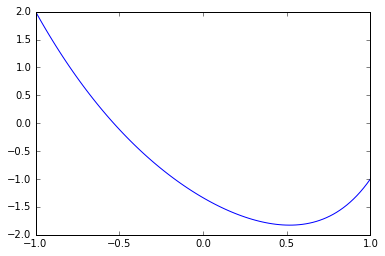

In [15]:
prob3()

(21,)
(21,)


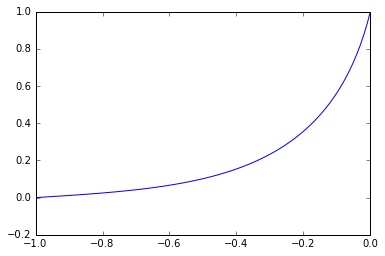

(21,)
(21,)


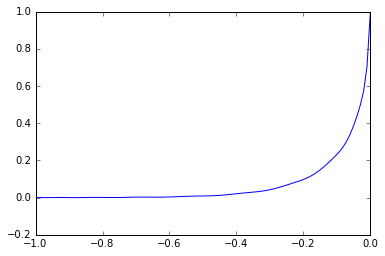

(21,)
(21,)


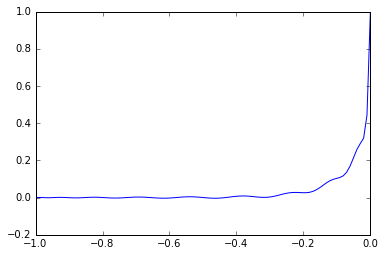

In [37]:
N = 20
D, x = cheb(20)
D2 = np.dot(D,D)
lambda_ = [4,8,12]
grid = np.linspace(-1,1,100)
for lam in lambda_:
    def F(U):
        out = 4*np.dot(D2,U) - lam*np.sinh(lam*U)  #Set up the equation you want the root of.
        #Make sure to set the boundaries correctly
        out[0],out[-1] = U[0]-1.,U[-1]
        return out  #Newtons Method will update U until the output is all 0's.
    guess = np.ones(N+1)    #Make your guess, same size as the cheb(N) output
    print np.shape(guess)
    print np.shape(x)
    solution = root(F, guess).x
    points = barycentric_interpolate(x,solution,grid)
    plt.plot(grid/2. - .5,points)
    plt.show()

# Problem 5

guess:  311.67858489
guess_2:  210.643469851
guess_2 has lower surface area
The graph below is graph 2: 


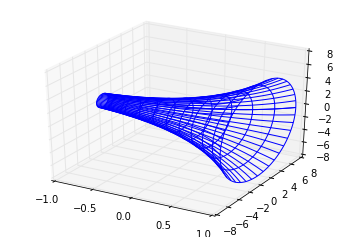

In [52]:
from mpl_toolkits.mplot3d import Axes3D
N = 50

D,X = cheb(N)

D2 = np.dot(D,D)
grid = np.linspace(-1,1,100)
def F(Y):
    DY = np.dot(D,Y)
    out = Y*np.dot(D2,Y) - DY*DY - np.ones(N+1)
    out[-1],out[0] = Y[-1] - 1.,Y[0] - 7.
    return out

guess = np.ones(N+1)    #Make your guess, same size as the cheb(N) output
guess_2 = 2*np.ones(N+1)
solution = root(F, guess).x

solution2 = root(F,guess_2).x

der_Y = np.dot(D,solution)
reg_Y = solution

SA_1 = np.sum(2*np.pi*reg_Y * np.sqrt(1+ (der_Y)**2))/25.
print 'guess: ',SA_1

der_Y2 = np.dot(D,solution2)
reg_Y2 = solution2

SA_2 = np.sum(2*np.pi*reg_Y2 * np.sqrt(1+ (der_Y2)**2))/25.
print 'guess_2: ',SA_2

print "guess_2 has lower surface area"

barycentric = barycentric_interpolate(X,solution2,grid)  #This is the output of barycentric_interpolate() on-100 points
lin = np.linspace(-1, 1, 100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
print "The graph below is graph 2: "
plt.show()